### スコアをOCRする

- スコアのみをOCRしたいが、デフォルトでは7セグメントのフォントを認識できない
- そのため、以下のgithubから学習済みデータ(7seg)を使用
https://github.com/Shreeshrii/tessdata_ssd

In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pytesseract

['102', '101', '93', '92', '91', '87', '83', '75', '73', '72', '60', '55']


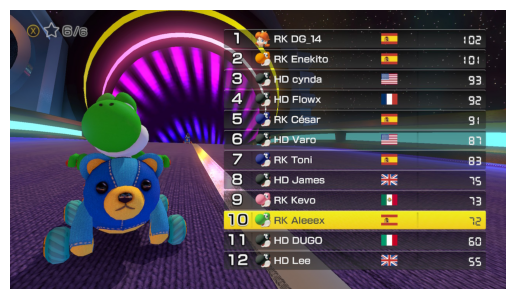

In [4]:
def ocr_score(pic):
    texts = []
    width = 60; height = 40 #切り出す画像のサイズ
    x = 1165; y = 54 # 基準点

    img = cv2.imread(pic, cv2.IMREAD_GRAYSCALE)

    for i in range(12):
        # 分割、2値化
        img_convert = img[y:y+height, x:x+width]
        y = y + height + 12
        ret, img_convert = cv2.threshold(img_convert, 180, 255, cv2.THRESH_BINARY)

        # 自分の点数(黄色背景)を変換
        if img_convert[0][0] == 255:
            img_convert = 255 - img_convert

        # ノイズ除去
        kernel = np.ones((3, 3), np.uint8)
        img_convert = cv2.dilate(img_convert, kernel, iterations=1)
        img_convert = cv2.erode(img_convert, kernel, iterations=1)
        img_convert = 255 - img_convert

        # 画像を出力(デバッグ用)
        debug_pass = "../data/interim/score"
        if not os.path.exists(debug_pass):
            os.mkdir(debug_pass)
        cv2.imwrite(f"{debug_pass}/{i}.jpeg", img_convert)

        #文字認識
        text = pytesseract.image_to_string(img_convert, lang='7seg', config='-c tessedit_char_whitelist=0123456789 --psm 8').strip()
        texts.append(text)

    return texts

# 出力
img_pass = "../data/raw/0.jpeg"

print(ocr_score(img_pass))

img = cv2.imread(img_pass)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()